In [47]:
import pandas as pd
import numpy as np

In [48]:
test_df=pd.read_csv('test_titanic.csv')
train_df=pd.read_csv('train_titanic.csv')

In [49]:
#now we combine both of them to get total population and then
#apply CLt to see the dissrence with actual population results

In [50]:
train_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [51]:
test_df.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
260,1152,3,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.4000,NaN,S
340,1232,2,"Fillbrook, Mr. Joseph Charles",male,18.0,0,0,C.A. 15185,10.5000,NaN,S
272,1164,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1,0,13508,136.7792,C89,C


In [52]:
df=pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309) #doing shuffling by sample

In [53]:
df.shape

(1309, 11)

<Axes: ylabel='Density'>

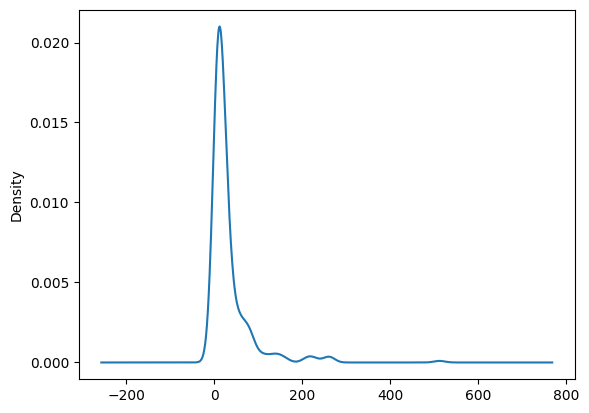

In [54]:
df['Fare'].plot(kind='kde')

In [55]:
#sample size=50 and no. of times 100
samples=[]
for i in range(100):
  samples.append(df['Fare'].dropna().sample(50).values.tolist())

In [56]:
samples=np.array(samples)

In [57]:
samples.shape

(100, 50)

In [58]:
sampling_means=samples.mean(axis=1)

In [59]:
import seaborn as sns

<Axes: ylabel='Density'>

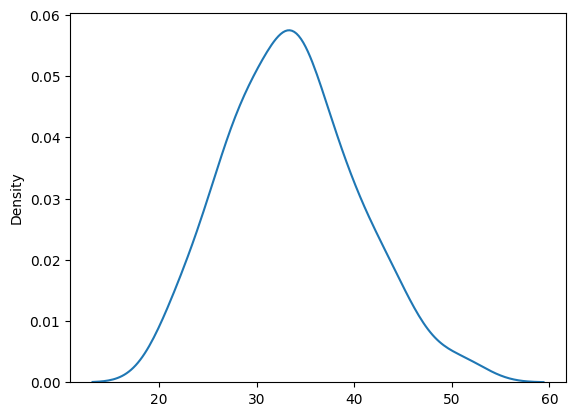

In [60]:
sns.kdeplot(sampling_means)

In [61]:
sampling_means.mean()

33.58729545999999

In [62]:
#this mean is not exactly equal to population mean but nearly equal to that
#so thats why instead of exact value it is preferred to give interval
#which is confidence interval
# we calc. this by telling -2*std to +2*std as that tell 95% confidence of
#sample mean equal to population mean as 2std cover 95%


In [63]:
sampling_means.std()/np.sqrt(50)

0.9320704337581607

In [64]:
lower_limit=sampling_means.mean()-2*(sampling_means.std()/np.sqrt(50))
upper_limit=sampling_means.mean()+2*(sampling_means.std()/np.sqrt(50))

In [65]:
print(f'range is {lower_limit} to {upper_limit}')

range is 31.72315459248367 to 35.45143632751631


In [66]:
print(f'actual population mean {df["Fare"].dropna().mean()}')

actual population mean 33.29547928134557


In [67]:
#rather than point estimation we give interval estimation

In [68]:
#above we applies z procedure for finding confidence interval(or above
#procedure is not correct? check this out),
#now going for t distribution

In [69]:
#sample size=30 and no. of times 100
samples=[]
means=[]
stds=[]
for i in range(100):
  x=df['Fare'].dropna().sample(30).values
  stds.append(x.std())
  means.append(x.mean())

In [70]:
#this is our s
sample_std=np.mean(stds)
sample_std

46.48223784493183

<Axes: ylabel='Density'>

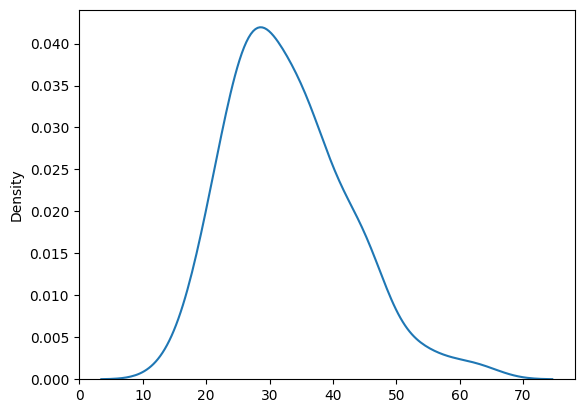

In [71]:
sns.kdeplot(means)

<Axes: ylabel='Density'>

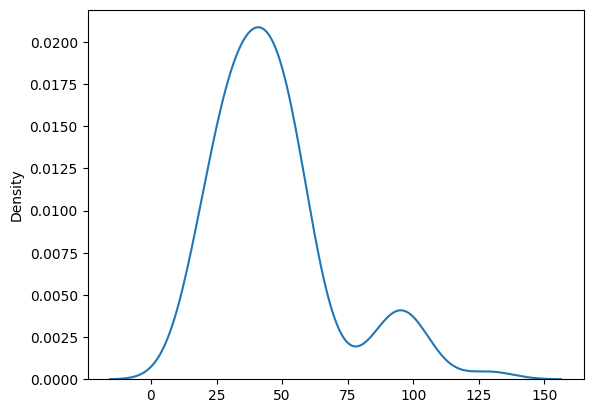

In [72]:
sns.kdeplot(stds)

In [80]:

#now calc t(alpha/2) bt t table thta comes 2.042 for 95%
lower_limit=np.mean(means)-2.042*(sample_std/np.sqrt(30))
upper_limit=np.mean(means)+2.042*(sample_std/np.sqrt(30))

In [81]:
print(f'range is {lower_limit} to {upper_limit}')

range is 15.584125656666487 to 50.2428149433335


In [82]:
#now calc t(alpha/2) bt t table thta comes 0.683 for 50%
lower_limit=np.mean(means)-0.683*(sample_std/np.sqrt(30))
upper_limit=np.mean(means).mean()+0.683*(sample_std/np.sqrt(30))

In [83]:
print(f'range is {lower_limit} to {upper_limit}')

range is 27.11722035318472 to 38.709720246815266


In [77]:
print(f'actual population mean {df["Fare"].dropna().mean()}')

actual population mean 33.29547928134557
